In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [32]:
depress_df = pd.read_csv("../datasets/Student Depression Dataset.csv")
depress_df.sample(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
3093,15666,Female,29.0,Kalyan,Student,4.0,0.0,9.13,1.0,0.0,7-8 hours,Unhealthy,MA,Yes,2.0,2.0,No,1
3115,15755,Male,20.0,Delhi,Student,3.0,0.0,8.95,4.0,0.0,7-8 hours,Unhealthy,Class 12,Yes,10.0,4.0,No,1
22808,115027,Female,34.0,Bangalore,Student,5.0,0.0,9.50,2.0,0.0,More than 8 hours,Moderate,B.Ed,Yes,6.0,3.0,No,1
20388,103227,Female,28.0,Meerut,Student,3.0,0.0,9.63,1.0,0.0,Less than 5 hours,Moderate,B.Com,Yes,8.0,2.0,No,1
17480,88445,Male,30.0,Rajkot,Student,4.0,0.0,8.92,2.0,0.0,Less than 5 hours,Moderate,BCA,No,8.0,3.0,No,1


https://www.kaggle.com/datasets/hopesb/student-depression-dataset

In [33]:
depress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [34]:
depress_df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [35]:
depress_df["Financial Stress"] = depress_df["Financial Stress"].fillna(depress_df["Financial Stress"].mean())

In [36]:
depress_df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [37]:
depress_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Financial Stress,27901.0,3.139867,1.437269,1.0,2.00,3.00,4.00,5.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [38]:
depress_df.describe(include='object').T

,count,unique,top,freq
Gender,27901,2,Male,15547
City,27901,52,Kalyan,1570
Profession,27901,14,Student,27870
Sleep Duration,27901,5,Less than 5 hours,8310
Dietary Habits,27901,4,Unhealthy,10317
Degree,27901,28,Class 12,6080
Have you ever had suicidal thoughts ?,27901,2,Yes,17656
Family History of Mental Illness,27901,2,No,14398


In [39]:
depress_df['Profession'].value_counts()

Profession
Student                   27870
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [40]:
depress_df['Degree'].value_counts()

Degree
Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [41]:
depress_df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [42]:
depress_df['Sleep Duration'] = depress_df['Sleep Duration'].replace({'Others':depress_df['Sleep Duration'].mode()[0]})

In [43]:
num_cols = depress_df.select_dtypes(include=["number"]).columns
num_cols

Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')

In [44]:
cat_cols = depress_df.select_dtypes('object').columns
cat_cols

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')

In [45]:
cols_to_drop = ['id', 'City', 'Degree', 'Depression', 'Profession']
X = depress_df.drop(cols_to_drop, axis=1)  # Удаляем таргет
y = depress_df['Depression']

In [46]:
cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes(include=["number"]).columns

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols),
        ('num', StandardScaler(), num_cols)
    ], remainder='passthrough')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
rf_gini = RandomForestClassifier(n_estimators= 100,
                            bootstrap=True,
                            criterion='gini',
                            max_features='sqrt',
                            n_jobs=-1, 
                            random_state=0)


In [50]:
rf_gini_pipeline = make_pipeline(preprocessor, rf_gini)
rf_gini_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
# извлекаем имена признаков после one-hot кодирования
ct = rf_gini_pipeline.named_steps['columntransformer']
ohe = ct.named_transformers_['cat']
ohe_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols.to_list() + ohe_names

# извлекаем важности признаков
importances = rf_gini_pipeline.named_steps['randomforestclassifier'].feature_importances_
feat_imp_gini = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_gini = feat_imp_gini.sort_values('importance', ascending=False).reset_index(drop=True)

# топ-20 признаков
feat_imp_gini.head(20)

,feature,importance
0,Dietary Habits_Moderate,0.160384
1,Sleep Duration_5-6 hours,0.126021
2,Sleep Duration_7-8 hours,0.124525
3,Dietary Habits_Unhealthy,0.112342
4,Dietary Habits_Healthy,0.105437
5,Family History of Mental Illness_Yes,0.099718
6,Family History of Mental Illness_No,0.089365
7,Have you ever had suicidal thoughts ?_No,0.054347
8,Gender_Male,0.017196
9,Work/Study Hours,0.012539


In [52]:
rf_entropy = RandomForestClassifier(n_estimators= 100,
                            bootstrap=True,
                            criterion='entropy',
                            max_features='sqrt',
                            n_jobs=-1, 
                            random_state=0)

rf_entropy_pipeline = make_pipeline(preprocessor, rf_entropy)
rf_entropy_pipeline.fit(X_train, y_train)

# извлекаем имена признаков после one-hot кодирования
ct = rf_entropy_pipeline.named_steps['columntransformer']
ohe = ct.named_transformers_['cat']
ohe_names = list(ohe.get_feature_names_out(cat_cols))
feature_names = num_cols.to_list() + ohe_names

# извлекаем важности признаков
importances = rf_entropy_pipeline.named_steps['randomforestclassifier'].feature_importances_
feat_imp_entropy = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_entropy = feat_imp_entropy.sort_values('importance', ascending=False).reset_index(drop=True)

# топ-20 признаков
feat_imp_entropy

,feature,importance
0,Dietary Habits_Moderate,0.151593
1,Dietary Habits_Unhealthy,0.124745
2,Dietary Habits_Healthy,0.114108
3,Sleep Duration_5-6 hours,0.107314
4,Sleep Duration_7-8 hours,0.101751
5,Family History of Mental Illness_Yes,0.098694
6,Family History of Mental Illness_No,0.097630
7,Have you ever had suicidal thoughts ?_No,0.060552
8,Gender_Male,0.017029
9,Age,0.013676


In [53]:
y_pred = rf_gini_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1829  514]
 [ 449 2789]]


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.83      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.83      0.83      5581



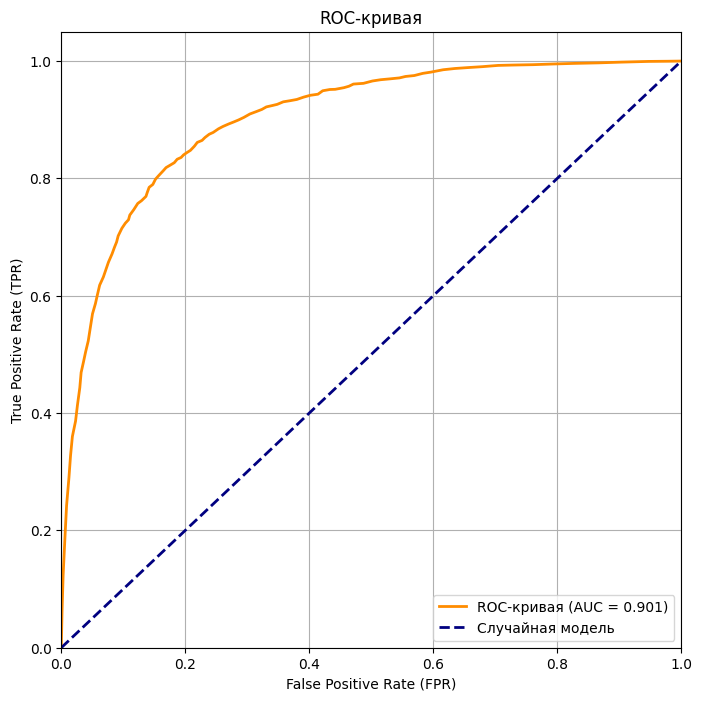

In [55]:
y_pred_proba = rf_gini_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC-кривая (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайная модель')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [56]:
accuracy_score(y_test, y_pred)

0.8274502777280057

In [57]:
grades_df = pd.read_csv("../datasets/data.csv")
cols_to_drop = ['Grades']
X = grades_df.drop(cols_to_drop, axis=1)  # Удаляем таргет
y = grades_df['Grades']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [58]:
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name}:')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}\n')

print_metrics(y_test, y_pred_rf, 'Случайный лес')


Случайный лес:
R2: 0.9805
MAE: 0.9015
MSE: 1.4719

